In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
#poisson
λ = 2 
cars_dist = stats.poisson(λ)

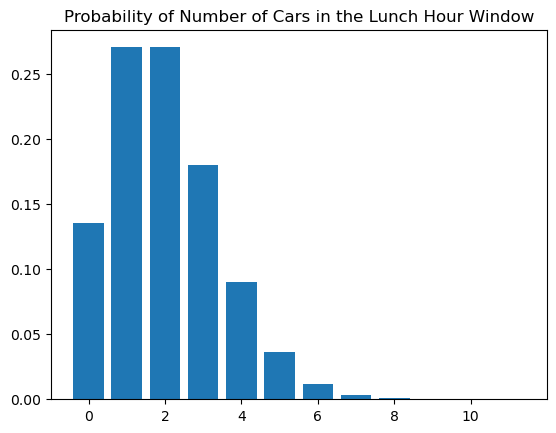

In [10]:
# how make a chart?
# make a domain? 0 - 11
# make a range? PMF: the probability of any given instance happening
xs = range(12)
ys = [cars_dist.pmf(x) for x in xs]
plt.bar(xs, ys)
plt.title('Probability of Number of Cars in the Lunch Hour Window')
plt.show()

In [5]:
#likely hood no cars
cars_dist.pmf(0)

0.1353352832366127

In [8]:
#likely hood 3 or more cars
cars_dist.sf(2)

0.32332358381693654

In [11]:
#likely hood at least one car
cars_dist.sf(0)

0.8646647167633873

In [20]:
μ = 3.0
σ = 0.3
gpa_dist = stats.norm(μ, σ)

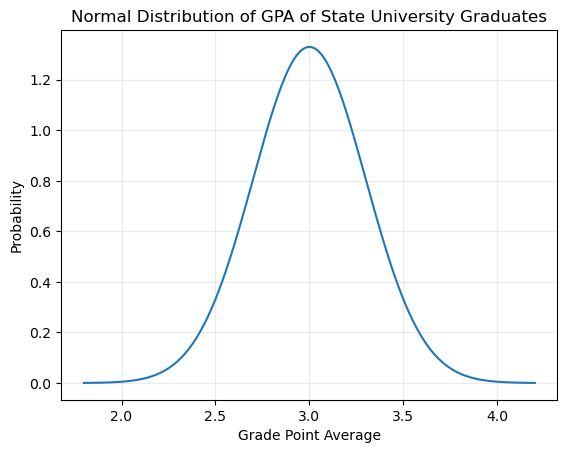

In [21]:
maxish = (σ * 4) + μ
minish = μ - (σ * 4)
domain = np.arange(minish,maxish,0.01)

# This is a continuous distribution, so it's using pdf
gpa_range = [gpa_dist.pdf(n) for n in domain]
plt.plot(domain,gpa_range)
plt.title('Normal Distribution of GPA of State University Graduates')
plt.xlabel('Grade Point Average')
plt.ylabel('Probability')

# Add features
plt.xticks()
plt.grid(alpha=0.25)

plt.show()

In [25]:
# grade point to be in top 5% of class *ISF
round(gpa_dist.isf(0.05),3)


3.493

In [28]:
# GPA bottom 15% *ppf (inverse of ISF)
round(gpa_dist.ppf(0.15),3)

2.689

In [37]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?
x = 2.8
# third decile is btwn 20 & 30%
gpa_dist.ppf(.2)
gpa_dist.ppf(.3)

2.842679846187588

In [35]:
lower, upper = gpa_dist.ppf([.2,.3])
lower, upper

(2.7475136299281258, 2.842679846187588)

In [39]:
lower < x < upper

True

In [41]:
# what percentile if 3.5 gpa *CDF

gpa_dist.cdf(3.5)


0.9522096477271853

In [42]:
# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?

In [46]:
# binomial function for this
visitors = 4326 
p = 0.02 
clicks = 97 

click_thru = stats.binom(visitors,p)
click_thru

In [50]:
click_thru.sf(96) #not inclusive

0.13975823631416448

In [48]:
# You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.

# What is the probability that at least one of your first 60 answers is correct?

In [51]:

question_right = 1 / 101
n = 60
homework_dist = stats.binom(n, question_right)
# survival for any amount over zero:
round(homework_dist.sf(0), 2)

0.45

In [54]:
# The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 
# 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 
# 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each 
# day? How likely is it that it goes two days without getting cleaned up? All week?

p = .03
n = int(66*.9)
days = 5

cleaning_dist = stats.binom(n, p)


In [55]:
# liklihood of break room getting cleaned each day
cleaning_dist.sf(0)

0.8342199288437352

In [56]:
# likelihood two days without getting cleaned up
stats.binom(((n * 2) + 1), p).pmf(0)

0.026658541032798935

In [58]:
# likelihood 0
n = n * days
cleaning_dist = stats.binom(n,p)
cleaning_dist.pmf(0)

3.0782794474344185e-20

In [59]:
# you notice that the average number of people in line when your lunch break starts is normally distributed with a 
# mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from 
# ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food 
# before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La 
# Panaderia.



In [60]:
# avg number of people in line = 15
# std = 3
# 2 minutes per person to order
# 10 minutes to get food from ordering
# Odds of 15 minutes left to eat given an hour?

In [61]:
# Convert people into minutes of time they take
μ = 15 * 2
σ = 3 * 2

In [77]:
line_dist = stats.norm(μ, σ)

In [78]:
# 2 minutes to order
# 15 minutes to eat
# 10 minutes to get order
# 60 - (15+10+2)= 33

In [79]:
line_dist.cdf(33)

0.6914624612740131

In [82]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
df = pd.read_sql('SELECT * FROM salaries WHERE salaries.to_date > NOW()', url)
df.head()


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [67]:
# Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation.

In [84]:
sal_stats = df.salary.agg(['mean','std'])
sal_stats

mean    72012.235857
std     17309.995380
Name: salary, dtype: float64

In [68]:
# What percent of employees earn less than 60,000?

In [86]:
# we can use the star to unpack positional args
# from an iterable in the right order
#  ** will unpack kwargs from a dictionary
salary_dist = stats.norm(*sal_stats.values)
salary_dist.cdf(60_000)

0.24385742480214434

In [69]:
# What percent of employees earn more than 95,000?

In [88]:
salary_dist.sf(95000)

0.09208819199804058

In [70]:
# What percent of employees earn between 65,000 and 80,000?

In [90]:
salary_dist.sf(65000)-salary_dist.sf(80000)

0.3350605685446666

In [91]:
# What do the top 5% of employees make?

In [93]:
round(salary_dist.isf(.05),2)

100484.64